In [1]:
f = open('harry_7books.txt', encoding='utf8')
raw = f.read()

In [2]:
# tokenize 
import nltk
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(raw)

In [3]:
# remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
tokens = [t for t in tokens if t.lower() not in stopwords]

In [4]:
# transform to lower cases
tokens = [w.lower() for w in tokens]

In [5]:
# replacing \xad
tokens = [w.replace('\xad','') for w in tokens]

In [6]:
# Lemmatization
wnl = nltk.WordNetLemmatizer()
tokens = [wnl.lemmatize(w) for w in tokens]

In [7]:
# Word Frequency Analysis
from collections import Counter
counter = Counter(tokens)
print(counter.most_common(5))

[('harry', 18248), ('said', 14492), ('ron', 6332), ('hermione', 5209), ('back', 3271)]


In [8]:
# create DataFrame from dict
import pandas as pd
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.sort_values('freq', ascending=False)

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

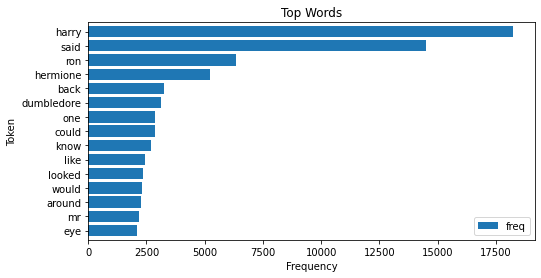

In [9]:
# Frequency plot
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

(-0.5, 399.5, 199.5, -0.5)

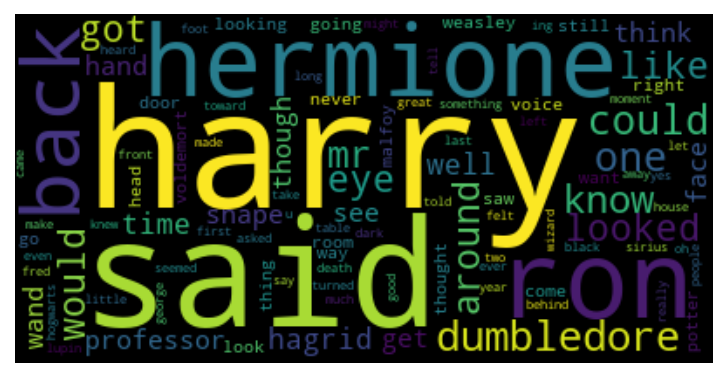

In [10]:
# Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate_from_frequencies(counter)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')